The Sparks Foundation - Data Science & Business Analytics Internship 

Step 1 Importing the data set

In [189]:
# import all required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [166]:
# reading data from the provided data set

df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [167]:
# Let's check the shape of the data

df.shape

(25, 2)

In [168]:
# Let's check the if any missing value in data set is there or not

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:>

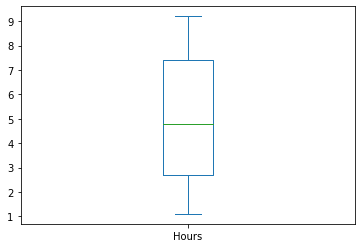

In [169]:
# Let's check if there is any outlier in the data set or not


df['Hours'].plot.box()

<AxesSubplot:>

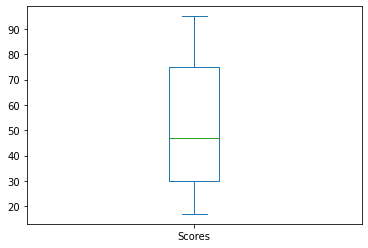

In [170]:
df['Scores'].plot.box()

In [171]:
# from above we can say that there is no outlier in the data set

Step 2 Visualizing the data set

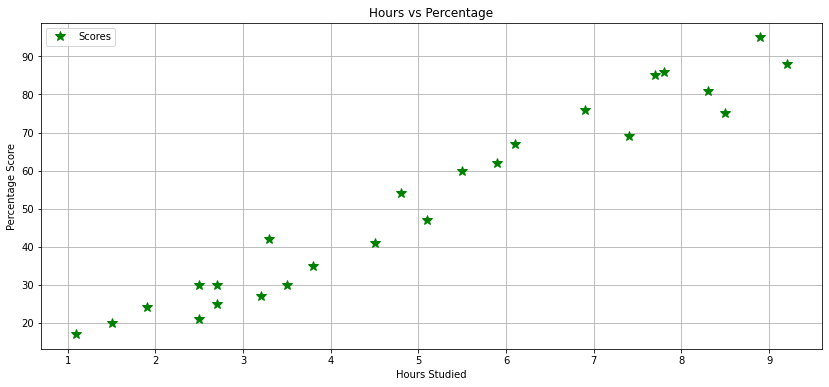

In [172]:
#Let's plot the data into 2-D graph and find the reationship between the data
# plotting the distiribution of scores with respect to hours


plt.rcParams["figure.figsize"]=[14,6]
df.plot(x='Hours', y='Scores', style='*', color='green', markersize='10')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [173]:
# above 2-D graph shows the positive linear regression between Percentage Score and Hours Studied

In [174]:
# Let's use linear regression supervised machine model to the data to predict further values

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Step 3 Data Preparation

in this step  we will divide the data into inputs and outputs after that we split the data into testing data and training data.

In [175]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [176]:
# Let's use iloc function to divide the data

x=df.iloc[:, :-1].values
y=df.iloc[:, 1].values

In [177]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [178]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

Step 4 Training and Algorithm

In [180]:
# let's train our Alogorithm as we have already slpit data into Training and Testing Set above

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Step 5 Model Visualizing 

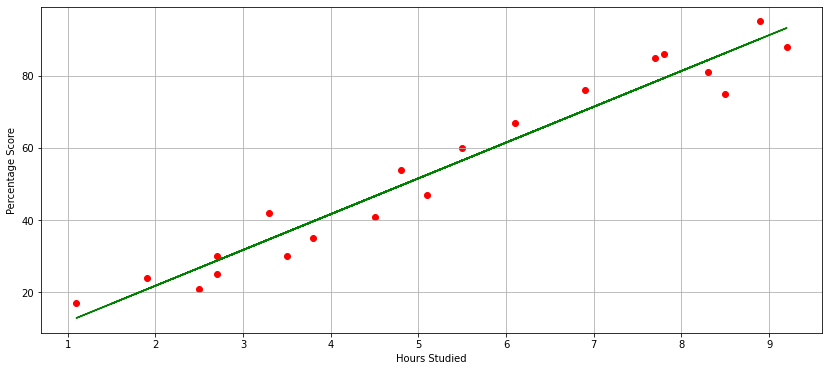

In [181]:
# Let's plot the training data

line=regressor.coef_*x+regressor.intercept_
plt.rcParams["figure.figsize"]=[14,6]
plt.scatter(x_train, y_train, color='red' )
plt.plot(x, line, color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

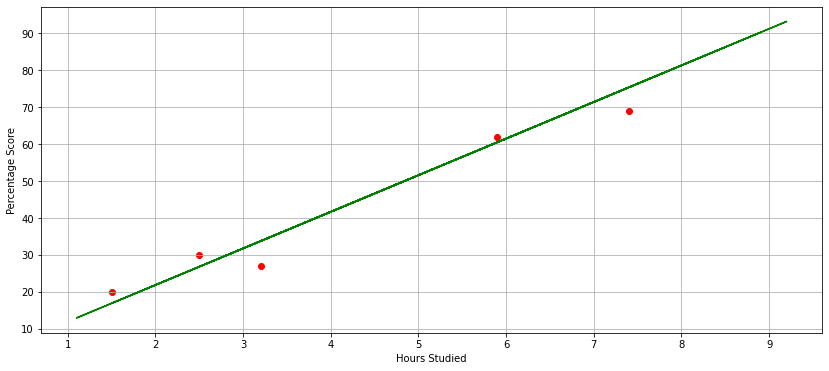

In [182]:
# Let's plot the training data


plt.rcParams["figure.figsize"]=[14,6]
plt.scatter(x_test, y_test, color='red' )
plt.plot(x, line, color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

Making Predictions

In [183]:
# Let's make some prediction

print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [184]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [185]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [186]:
# Let's compare Predicted vs Actual data

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [187]:
# Let's test with provided data (9.25Hours/day)


Hours=9.25
own_pred=regressor.predict([[Hours]])
print("Predicted Score = {}".format(own_pred[0]))

Predicted Score = 93.69173248737539


Step 7 Evaluating the model

In [190]:
# Let's evaluate the train model to calculate Mean Absolute Error


from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
